In [31]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [32]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-3 (1).csv")
df = df.sample(frac = 1)

In [33]:
df.columns

Index(['Unnamed: 0', 'Patient_ID', 'Platelets', 'Leukocytes', 'Eosinophils',
       'Monocytes', 'SARS-Cov-2_exam_result'],
      dtype='object')

In [34]:
df

,Unnamed: 0,Patient_ID,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
154,154,f2d6ab83db0f769,0.851824,0.670657,-0.329835,-0.587929,0
442,442,13c1dc179d15c97,0.211172,-0.620558,-0.540532,0.672705,0
554,554,5b7a01982d8f246,-0.693278,-1.171551,-0.835508,1.224233,1
533,533,f51586f2d2f53e7,1.253802,-0.400717,-0.835508,NaN,0
12,12,a2432a45830c32d,0.399599,-0.178094,-0.161278,0.593916,0
...,...,...,...,...,...,...,...
5,5,fc41531ca4faf1e,-0.178244,-0.075131,0.217977,0.068652,0
347,347,d88bc973d6012be,2.535107,2.159451,-0.835508,-1.008140,0
38,38,33fd6f1c08760a1,-0.354109,-0.041737,-0.076999,0.278757,0
440,440,0d6b8ad2ea31184,-0.768649,1.355224,0.681510,0.383810,0


In [35]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [36]:
df.shape

(602, 7)

In [37]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [38]:
df

,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
154,0.851824,0.670657,-0.329835,-0.587929,0
442,0.211172,-0.620558,-0.540532,0.672705,0
554,-0.693278,-1.171551,-0.835508,1.224233,1
533,1.253802,-0.400717,-0.835508,NaN,0
12,0.399599,-0.178094,-0.161278,0.593916,0
...,...,...,...,...,...
5,-0.178244,-0.075131,0.217977,0.068652,0
347,2.535107,2.159451,-0.835508,-1.008140,0
38,-0.354109,-0.041737,-0.076999,0.278757,0
440,-0.768649,1.355224,0.681510,0.383810,0


In [39]:
df.isnull().any()

Platelets                 False
Leukocytes                False
Eosinophils               False
Monocytes                  True
SARS-Cov-2_exam_result    False
dtype: bool

In [40]:
#df = df.fillna(lambda x: x.median())

In [41]:
data = df.to_numpy()

data.shape

(602, 5)

In [42]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 0.85182422,  0.67065746, -0.32983512, -0.58792883,  0.        ],
       [ 0.21117194, -0.62055796, -0.54053205,  0.67270511,  0.        ],
       [-0.69327831, -1.17155075, -0.83550769,  1.22423255,  1.        ],
       ...,
       [-0.3541095 , -0.04173729, -0.07699888,  0.27875698,  0.        ],
       [-0.76864922,  1.35522437,  0.68150997,  0.38380998,  0.        ],
       [ 0.08555385, -0.11687267,  2.49350333,  0.19996756,  0.        ]])

In [43]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

0.8290909090909091
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.88      0.95      0.91        75
Covid Positive       0.20      0.09      0.13        11

      accuracy                           0.84        86
     macro avg       0.54      0.52      0.52        86
  weighted avg       0.79      0.84      0.81        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.88      0.97      0.92       444
Covid Positive       0.50      0.21      0.29        72

      accuracy                           0.86       516
     macro avg       0.69      0.59      0.61       516
  weighted avg       0.83      0.86      0.83       516



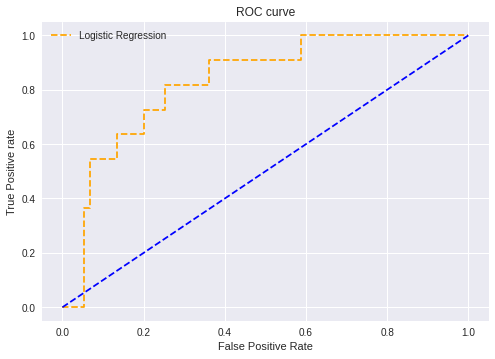

In [44]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [45]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[71,  4],
       [10,  1]])

In [46]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.8372093023255814
Mean accuracy for train set =  0.8604651162790697


# **NAIVE BAYES**

0.8242424242424242
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.93      0.91      0.92        75
Covid Positive       0.46      0.55      0.50        11

      accuracy                           0.86        86
     macro avg       0.70      0.73      0.71        86
  weighted avg       0.87      0.86      0.87        86



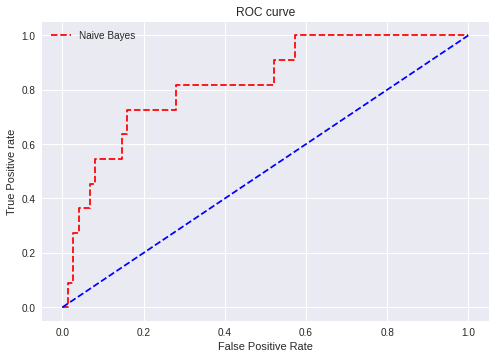

In [47]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [48]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.8604651162790697
Mean accuracy for train set =  0.8313953488372093


# ***Fisher Linear Discriminant***

0.8303030303030302
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.87      0.96      0.91        75
Covid Positive       0.00      0.00      0.00        11

      accuracy                           0.84        86
     macro avg       0.43      0.48      0.46        86
  weighted avg       0.76      0.84      0.79        86



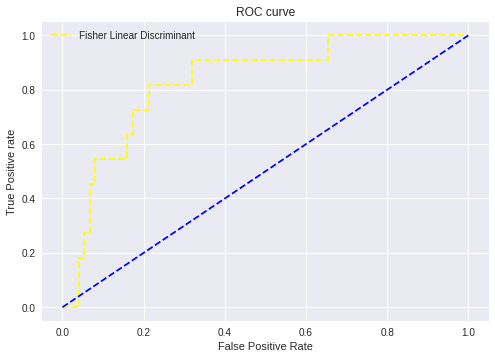

In [49]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [50]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8372093023255814
Mean accuracy for train set =  0.8527131782945736


# **KNN**

In [51]:
df

,Platelets,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2_exam_result
154,0.851824,0.670657,-0.329835,-0.587929,0
442,0.211172,-0.620558,-0.540532,0.672705,0
554,-0.693278,-1.171551,-0.835508,1.224233,1
533,1.253802,-0.400717,-0.835508,NaN,0
12,0.399599,-0.178094,-0.161278,0.593916,0
...,...,...,...,...,...
5,-0.178244,-0.075131,0.217977,0.068652,0
347,2.535107,2.159451,-0.835508,-1.008140,0
38,-0.354109,-0.041737,-0.076999,0.278757,0
440,-0.768649,1.355224,0.681510,0.383810,0


In [52]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
154,0
442,0
554,1
533,0
12,0
...,...
5,0
347,0
38,0
440,0


In [53]:
x=df[['Platelets','Leukocytes','Eosinophils','Monocytes']]
x

,Platelets,Leukocytes,Eosinophils,Monocytes
154,0.851824,0.670657,-0.329835,-0.587929
442,0.211172,-0.620558,-0.540532,0.672705
554,-0.693278,-1.171551,-0.835508,1.224233
533,1.253802,-0.400717,-0.835508,NaN
12,0.399599,-0.178094,-0.161278,0.593916
...,...,...,...,...
5,-0.178244,-0.075131,0.217977,0.068652
347,2.535107,2.159451,-0.835508,-1.008140
38,-0.354109,-0.041737,-0.076999,0.278757
440,-0.768649,1.355224,0.681510,0.383810


In [54]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 0.85182422,  0.67065746, -0.32983512, -0.58792883],
       [ 0.21117194, -0.62055796, -0.54053205,  0.67270511],
       [-0.69327831, -1.17155075, -0.83550769,  1.22423255],
       ...,
       [-0.3541095 , -0.04173729, -0.07699888,  0.27875698],
       [-0.76864922,  1.35522437,  0.68150997,  0.38380998],
       [ 0.08555385, -0.11687267,  2.49350333,  0.19996756]])

In [55]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8690909090909091


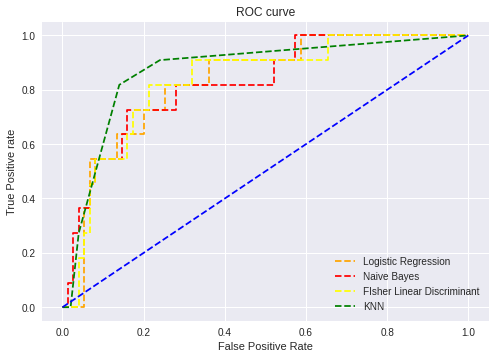

In [56]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [57]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [58]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [59]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [60]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 83.61%
The Confusion Matrix is:
  [[48  2]
 [ 8  3]]
                precision    recall  f1-score   support

Covid Negative       0.86      0.96      0.91        50
Covid Positive       0.60      0.27      0.37        11

      accuracy                           0.84        61
     macro avg       0.73      0.62      0.64        61
  weighted avg       0.81      0.84      0.81        61

